# PROJECT TITLE : HealthCare Analysis

In [2]:
import pandas as pd
import sqlite3
from sqlite3 import Error

def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn

In [3]:
def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name: # You can optionally pass drop_table_name to drop the table. 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

# Create Patient Table

In [10]:
def patient_table(data_filename, normalized_database_filename):
    # Inputs: Name of the data and normalized database filename
    # Output: None
    normalized_conn = create_connection(normalized_database_filename,delete_db=True)
    create_table(normalized_conn,"""CREATE TABLE IF NOT Exists [Patient]([PatientID] INTEGER NOT NULL PRIMARY KEY,
                                     [Name] TEXT NOT NULL,
                                     [Age] INTEGER NOT NULL,
                                     [Gender] TEXT NOT NULL,
                                     [Blood Group] TEXT NOT NULL);""")
    ls = []
    with open('healthcare_dataset.csv','r') as file:
        for line in file:
            if not line.strip():
                continue
            ls.append(line.strip())
        name = []
        age = []
        gender = []
        blood_group = []
        for i in ls[1:]:
            n = i.split(',')[0]
            a = i.split(',')[1]
            g = i.split(',')[2]
            bg = i.split(',')[3]
            if n not in name:
                name.append(n)
                age.append(a)
                gender.append(g)
                blood_group.append(bg)
            
        pat = list(zip(name,age,gender,blood_group))
        pat = sorted(pat, key = lambda x: x[0])
        
        
        sql = '''INSERT INTO Patient(Name,Age,Gender,"Blood Group") VALUES(?,?,?,?)'''
        with normalized_conn:
            normalized_conn.executemany(sql,pat)
        normalized_conn.close()

In [11]:
patient_table('healthcare_dataset.csv','healthcare.db')

In [12]:
conn = sqlite3.connect("healthcare.db")
df = pd.read_sql_query("""SELECT * FROM Patient""", conn)
display(df)

,PatientID,Name,Age,Gender,Blood Group
0,1,Aaron Burnett,54,Female,A-
1,2,Aaron Calderon,35,Female,AB+
2,3,Aaron Coleman,69,Male,A+
3,4,Aaron Daugherty,34,Male,B+
4,5,Aaron Davis,22,Female,AB-
...,...,...,...,...,...
9373,9374,Zachary Wood,36,Male,O-
9374,9375,Zachary Yates,37,Male,A-
9375,9376,Zoe Adkins DVM,30,Female,A+
9376,9377,Zoe Henderson,67,Female,AB+


# Create Doctor Table

In [13]:
def doctor_table(data_filename, normalized_database_filename):
    
    normalized_conn = create_connection(normalized_database_filename)
    create_table(normalized_conn,"""CREATE TABLE IF NOT Exists [Doctor]([DoctorID] INTEGER NOT NULL PRIMARY KEY,
                                     [Name] TEXT NOT NULL);""")
    ls = []
    with open('healthcare_dataset.csv','r') as file:
            for line in file:
                if not line.strip():
                    continue
                ls.append(line.strip())
            name = []
            for i in ls[1:]:
                n = i.split(',')[6]
                if n not in name:
                    name.append(n)
            name.sort()
            
            sql = '''INSERT INTO Doctor(Name) VALUES(?)'''
            with normalized_conn:
                for i in name:
                    normalized_conn.execute(sql,(i,))
            normalized_conn.close()

In [14]:
doctor_table('healthcare_dataset.csv','healthcare.db')

In [15]:
conn = sqlite3.connect("healthcare.db")
df = pd.read_sql_query("""SELECT * FROM Doctor""", conn)
display(df)

,DoctorID,Name
0,1,Aaron Anderson
1,2,Aaron Barrera
2,3,Aaron Boone
3,4,Aaron Brewer
4,5,Aaron Brown
...,...,...
9411,9412,Zachary Walsh
9412,9413,Zachary Wong
9413,9414,Zoe Cunningham
9414,9415,Zoe Garza


# Create Hospital Table

In [16]:
def hospital_table(data_filename, normalized_database_filename):
    
    normalized_conn = create_connection(normalized_database_filename)
    create_table(normalized_conn,"""CREATE TABLE IF NOT Exists [Hospital]([HospitalID] INTEGER NOT NULL PRIMARY KEY,
                                     [Name] TEXT NOT NULL);""")
    ls = []
    with open('healthcare_dataset.csv','r') as file:
            for line in file:
                if not line.strip():
                    continue
                ls.append(line.strip())
            hospital = []
            for i in ls[1:]:
                ele = i.split(',')
                if len(ele) == 15:
                    h = ele[7]
                    if h not in hospital:
                        hospital.append(h)
                else:
                    h = ele[7].strip('"') + ',' + ele[8].strip('"')
                    if h not in hospital:
                        hospital.append(h)
            hospital.sort()
            
            sql = '''INSERT INTO Hospital(Name) VALUES(?)'''
            with normalized_conn:
                for i in hospital:
                    normalized_conn.execute(sql,(i,))
            normalized_conn.close()

In [17]:
hospital_table('healthcare_dataset.csv','healthcare.db')

In [18]:
conn = sqlite3.connect("healthcare.db")
df = pd.read_sql_query("""SELECT * FROM Hospital""", conn)
display(df)

,HospitalID,Name
0,1,Abbott Inc
1,2,Abbott LLC
2,3,Abbott PLC
3,4,"Abbott, Curry and Moore"
4,5,Abbott-Jordan
...,...,...
8634,8635,"Zimmerman, Salinas and Hill"
8635,8636,Zuniga Ltd
8636,8637,"Zuniga, Taylor and Scott"
8637,8638,Zuniga-Chandler


# Create Insurance Table

In [19]:
def insurance_table(data_filename, normalized_database_filename):
    
    normalized_conn = create_connection(normalized_database_filename)
    create_table(normalized_conn,"""CREATE TABLE IF NOT Exists [InsuranceProvider]([InsuranceID] INTEGER NOT NULL PRIMARY KEY,
                                     [Name] TEXT NOT NULL);""")
    ls = []
    with open('healthcare_dataset.csv','r') as file:
            for line in file:
                if not line.strip():
                    continue
                ls.append(line.strip())
            ins_prov = []
            for i in ls[1:]:
                ele = i.split(',')
                if len(ele) == 15:
                    ins = ele[8]
                    if ins not in ins_prov:
                        ins_prov.append(ins)
                else:
                    ins = ele[9]
                    if ins not in ins_prov:
                        ins_prov.append(ins)
            ins_prov.sort()
            
            sql = '''INSERT INTO InsuranceProvider(Name) VALUES(?)'''
            with normalized_conn:
                for i in ins_prov:
                    normalized_conn.execute(sql,(i,))
            normalized_conn.close()

In [20]:
insurance_table('healthcare_dataset.csv','healthcare.db')

In [21]:
conn = sqlite3.connect("healthcare.db")
df = pd.read_sql_query("""SELECT * FROM InsuranceProvider""", conn)
display(df)

,InsuranceID,Name
0,1,Aetna
1,2,Blue Cross
2,3,Cigna
3,4,Medicare
4,5,UnitedHealthcare


Create dictionaries for patient, doctor, hospital and insurance table for foreign key lookup

In [22]:
def patient_patiendid(normalized_database_filename):
    normalized_conn = create_connection(normalized_database_filename)
    sql_statement = '''SELECT PatientID, Name FROM Patient'''
    p = execute_sql_statement(sql_statement,normalized_conn)
    p_dic = {}
    for i in p:
        pid,pn = i
        p_dic[pn] = pid
    return p_dic

In [23]:
def doctor_doctorid(normalized_database_filename):
    normalized_conn = create_connection(normalized_database_filename)
    sql_statement = '''SELECT DoctorID, Name FROM Doctor'''
    d = execute_sql_statement(sql_statement,normalized_conn)
    d_dic = {}
    for i in d:
        did,dn = i
        d_dic[dn] = did
    return d_dic

In [24]:
def hospital_hospitalid(normalized_database_filename):
    normalized_conn = create_connection(normalized_database_filename)
    sql_statement = '''SELECT HospitalID, Name FROM Hospital'''
    h = execute_sql_statement(sql_statement,normalized_conn)
    h_dic = {}
    for i in h:
        hid,hn = i
        h_dic[hn] = hid
    return h_dic

In [25]:
def insurance_insuranceid(normalized_database_filename):
    normalized_conn = create_connection(normalized_database_filename)
    sql_statement = '''SELECT InsuranceID, Name FROM InsuranceProvider'''
    ins = execute_sql_statement(sql_statement,normalized_conn)
    i_dic = {}
    for i in ins:
        iid,inp = i
        i_dic[inp] = iid
    return i_dic

# Create Disease Table

In [26]:
def disease_table(data_filename, normalized_database_filename):
    normalized_conn = create_connection(normalized_database_filename)
    create_table(normalized_conn,"""CREATE TABLE IF NOT Exists [Disease]([DiseaseID] INTEGER NOT NULL PRIMARY KEY,
                                     [DiseaseName] TEXT NOT NULL);""")
    ls = []
    with open(data_filename,'r') as file:
        for line in file:
            if not line.strip():
                continue
            ls.append(line.strip())
        dis = []
        for i in ls[1:]:
            d = i.split(',')[4]
            if d not in dis:
                dis.append(d)
        dis.sort()
        sql = '''INSERT INTO Disease(DiseaseName) VALUES(?)'''
        with normalized_conn:
            for i in dis:
                normalized_conn.execute(sql,(i,))
        normalized_conn.close()

In [27]:
disease_table('healthcare_dataset.csv','healthcare.db')

In [28]:
conn = sqlite3.connect("healthcare.db")
df = pd.read_sql_query("""SELECT * FROM Disease""", conn)
display(df)

,DiseaseID,DiseaseName
0,1,Arthritis
1,2,Asthma
2,3,Cancer
3,4,Diabetes
4,5,Hypertension
5,6,Obesity


# Create Medication Table

In [29]:
def medication_table(data_filename, normalized_database_filename):
    normalized_conn = create_connection(normalized_database_filename)
    create_table(normalized_conn,"""CREATE TABLE IF NOT Exists [Medication]([MedicationID] INTEGER NOT NULL PRIMARY KEY,
                                     [MedicationName] TEXT NOT NULL);""")
    ls = []
    with open(data_filename,'r') as file:
        for line in file:
            if not line.strip():
                continue
            ls.append(line.strip())
        med = []
        for i in ls[1:]:
            ele = i.split(',')
            if len(ele) == 15:
                m = ele[13]
                if m not in med:
                    med.append(m)
            else:
                m = ele[14]
                if m not in med:
                    med.append(m)
        med.sort()
        sql = '''INSERT INTO Medication(MedicationName) VALUES(?)'''
        with normalized_conn:
            for i in med:
                normalized_conn.execute(sql,(i,))
        normalized_conn.close()

In [30]:
medication_table('healthcare_dataset.csv','healthcare.db')
conn = sqlite3.connect("healthcare.db")
df = pd.read_sql_query("""SELECT * FROM Medication""", conn)
display(df)

,MedicationID,MedicationName
0,1,Aspirin
1,2,Ibuprofen
2,3,Lipitor
3,4,Paracetamol
4,5,Penicillin


# Create Admission Type Table

In [31]:
def adtype_table(data_filename, normalized_database_filename):
    normalized_conn = create_connection(normalized_database_filename)
    create_table(normalized_conn,"""CREATE TABLE IF NOT Exists [AdmissionType]([AdTypeID] INTEGER NOT NULL PRIMARY KEY,
                                     [Type] TEXT NOT NULL);""")
    ls = []
    with open(data_filename,'r') as file:
        for line in file:
            if not line.strip():
                continue
            ls.append(line.strip())
        adt = []
        for i in ls[1:]:
            ele = i.split(',')
            if len(ele) == 15:
                a = ele[11]
                if a not in adt:
                    adt.append(a)
            else:
                a = ele[12]
                if a not in adt:
                    adt.append(a)
        adt.sort()
        sql = '''INSERT INTO AdmissionType(Type) VALUES(?)'''
        with normalized_conn:
            for i in adt:
                normalized_conn.execute(sql,(i,))
        normalized_conn.close()

In [32]:
adtype_table('healthcare_dataset.csv','healthcare.db')
conn = sqlite3.connect("healthcare.db")
df = pd.read_sql_query("""SELECT * FROM AdmissionType""", conn)
display(df)

,AdTypeID,Type
0,1,Elective
1,2,Emergency
2,3,Urgent


# Create Result Table

In [33]:
def result_table(data_filename, normalized_database_filename):
    normalized_conn = create_connection(normalized_database_filename)
    create_table(normalized_conn,"""CREATE TABLE IF NOT Exists [Result]([ResultID] INTEGER NOT NULL PRIMARY KEY,
                                     [ResultType] TEXT NOT NULL);""")
    ls = []
    with open(data_filename,'r') as file:
        for line in file:
            if not line.strip():
                continue
            ls.append(line.strip())
        res = []
        for i in ls[1:]:
            ele = i.split(',')
            if len(ele) == 15:
                r = ele[14]
                if r not in res:
                    res.append(r)
            else:
                r = ele[15]
                if r not in res:
                    res.append(r)
        res.sort()
        sql = '''INSERT INTO Result(ResultType) VALUES(?)'''
        with normalized_conn:
            for i in res:
                normalized_conn.execute(sql,(i,))
        normalized_conn.close()

In [34]:
result_table('healthcare_dataset.csv','healthcare.db')
conn = sqlite3.connect("healthcare.db")
df = pd.read_sql_query("""SELECT * FROM Result""", conn)
display(df)

,ResultID,ResultType
0,1,Abnormal
1,2,Inconclusive
2,3,Normal


Create dictionaries for disease, medication, admission type and result table for foreign key lookup

In [35]:
def disease_diseaseid(normalized_database_filename):
    normalized_conn = create_connection(normalized_database_filename)
    sql_statement = '''SELECT DiseaseID, DiseaseName FROM Disease'''
    diss = execute_sql_statement(sql_statement,normalized_conn)
    di_dic = {}
    for i in diss:
        did,d = i
        di_dic[d] = did
    return di_dic

In [36]:
disease_diseaseid('healthcare.db')

{'Arthritis': 1,
 'Asthma': 2,
 'Cancer': 3,
 'Diabetes': 4,
 'Hypertension': 5,
 'Obesity': 6}

In [37]:
def medication_medicationid(normalized_database_filename):
    normalized_conn = create_connection(normalized_database_filename)
    sql_statement = '''SELECT MedicationID, MedicationName FROM Medication'''
    med = execute_sql_statement(sql_statement,normalized_conn)
    med_dic = {}
    for i in med:
        mid,m = i
        med_dic[m] = mid
    return med_dic

In [38]:
medication_medicationid('healthcare.db')

{'Aspirin': 1, 'Ibuprofen': 2, 'Lipitor': 3, 'Paracetamol': 4, 'Penicillin': 5}

In [39]:
def adid_adtypeid(normalized_database_filename):
    normalized_conn = create_connection(normalized_database_filename)
    sql_statement = '''SELECT AdTypeID, Type FROM AdmissionType'''
    ad = execute_sql_statement(sql_statement,normalized_conn)
    ad_dic = {}
    for i in ad:
        aid,a = i
        ad_dic[a] = aid
    return ad_dic

In [40]:
adid_adtypeid('healthcare.db')

{'Elective': 1, 'Emergency': 2, 'Urgent': 3}

In [41]:
def res_resid(normalized_database_filename):
    normalized_conn = create_connection(normalized_database_filename)
    sql_statement = '''SELECT ResultID, ResultType FROM Result'''
    res = execute_sql_statement(sql_statement,normalized_conn)
    res_dic = {}
    for i in res:
        rid,r = i
        res_dic[r] = rid
    return res_dic

In [42]:
res_resid('healthcare.db')

{'Abnormal': 1, 'Inconclusive': 2, 'Normal': 3}

# Creating Admission Table

# The admission table references the 8 other tables of the database through Primary Key - Foreign Key relationship. Below are the relationship between the tables:
Admission - Patient --> One to One Relationship
Admission - Doctor --> One to Many Relationship
Admission - Hospital --> One to Many Relationship
Admission - Insurance --> One to Many Relationship
Admission - Disease --> One to Many Relationship
Admission - Medication --> One to Many Relationship
Admission - AdType --> One to Many Relationship
Admission - Result --> One to Many Relationship

In [43]:
from datetime import datetime
def admission_table(data_filename, normalized_database_filename):
    normalized_conn = create_connection(normalized_database_filename)
    create_table(normalized_conn,"""CREATE TABLE IF NOT Exists [Admission]([ID] INTEGER NOT NULL PRIMARY KEY,
                                     [PatientID] INTEGER NOT NULL,
                                     [DoctorID] INTEGER NOT NULL,
                                     [HospitalID]INTEGER NOT NULL,
                                     [InsuranceID] INTEGER NOT NULL,
                                     [DiseaseID] INTEGER NOT NULL,
                                     [MedicationID] INTEGER NOT NULL,
                                     [AdTypeID] INETEGR NOT NULL,
                                     [ResultID] INTEGER NOT NULL,
                                     [DateofAdmission] INTEGER NOT NULL,
                                     [BillingAmount] REAL NOT NULL,
                                     [RoomNumber] INTEGER NOT NULL,
                                     [DischargeDate] INTEGER NOT NULL,
                                     FOREIGN KEY (PatientID) REFERENCES Patient(PatientID)
                                     FOREIGN KEY (DoctorID) REFERENCES Doctor(DoctorID)
                                     FOREIGN KEY (HospitalID) REFERENCES Hospital(HospitalID)
                                     FOREIGN KEY (InsuranceID) REFERENCES InsuranceProvider(InsuranceID)
                                     FOREIGN KEY (DiseaseID) REFERENCES Disease(DiseaseID)
                                     FOREIGN KEY (MedicationID) REFERENCES Medication(MedicationID)
                                     FOREIGN KEY (AdTypeID) REFERENCES AdmissionType(AdTypeID)
                                     FOREIGN KEY (ResultID) REFERENCES Result(ResultID));""")
    
    dic1 = patient_patiendid(normalized_database_filename)
    dic2 = doctor_doctorid(normalized_database_filename)
    dic3 = hospital_hospitalid(normalized_database_filename)
    dic4 = insurance_insuranceid(normalized_database_filename)
    dic5 = disease_diseaseid(normalized_database_filename)
    dic6 = medication_medicationid(normalized_database_filename)
    dic7 = adid_adtypeid(normalized_database_filename)
    dic8 = res_resid(normalized_database_filename)
    
    ls = []
    with open(data_filename,'r') as file:
        for line in file:
            if not line.strip():
                continue
            ls.append(line.strip())
        pat = []
        doc = []
        hos = []
        insp = []
        dis = []
        medi = []
        adty = []
        rest = []
        da = []
        ba = []
        rn = []
        dd = []
        
        for i in ls[1:]:
            ele = i.split(',')
            
            if len(ele) == 15:
                pat.append(dic1[ele[0]])
                doc.append(dic2[ele[6]])
                dis.append(dic5[ele[4]])
                da.append(datetime.strptime(ele[5], '%Y-%m-%d').strftime('%Y-%m-%d'))
                hos.append(dic3[ele[7]])
                insp.append(dic4[ele[8]])
                ba.append(float(ele[9]))
                rn.append(int(ele[10]))
                adty.append(dic7[ele[11]])
                dd.append(datetime.strptime(ele[12], '%Y-%m-%d').strftime('%Y-%m-%d'))
                medi.append(dic6[ele[13]])
                rest.append(dic8[ele[14]])
            else:
                pat.append(dic1[ele[0]])
                doc.append(dic2[ele[6]])
                dis.append(dic5[ele[4]])
                da.append(datetime.strptime(ele[5], '%Y-%m-%d').strftime('%Y-%m-%d'))
                hos.append(dic3[ele[7].strip('"') + ',' + ele[8].strip('"')])
                insp.append(dic4[ele[9]])
                ba.append(float(ele[10]))
                rn.append(int(ele[11]))
                adty.append(dic7[ele[12]])
                dd.append(datetime.strptime(ele[13], '%Y-%m-%d').strftime('%Y-%m-%d'))
                medi.append(dic6[ele[14]])
                rest.append(dic8[ele[15]])
                
        admission = list(zip(pat,doc,hos,insp,dis,medi,adty,rest,da,ba,rn,dd))
        sql = '''INSERT INTO Admission(PatientID,DoctorID,HospitalID,InsuranceID,DiseaseID,MedicationID,
        AdTypeID,ResultID,DateofAdmission,BillingAmount,RoomNumber,DischargeDate) VALUES(?,?,?,?,?,?,?,?,?,?,?,?)'''
                          
        with normalized_conn:
            normalized_conn.executemany(sql,admission)

        normalized_conn.close()

In [44]:
admission_table('healthcare_dataset.csv','healthcare.db')
conn = sqlite3.connect("healthcare.db")
df = pd.read_sql_query("""SELECT * FROM Admission""", conn)
display(df)

,ID,PatientID,DoctorID,HospitalID,InsuranceID,DiseaseID,MedicationID,AdTypeID,ResultID,DateofAdmission,BillingAmount,RoomNumber,DischargeDate
0,1,8838,7168,7961,4,4,1,1,2,2022-11-17,37490.983364,146,2022-12-01
1,2,7737,2598,979,5,2,3,2,3,2023-06-01,47304.064845,404,2023-06-15
2,3,1509,7181,7997,4,6,3,2,3,2019-01-09,36874.896997,292,2019-02-08
3,4,722,1170,2483,4,2,5,3,1,2020-05-02,23303.322092,480,2020-05-03
4,5,6783,2776,3909,5,1,4,3,3,2021-07-09,18086.344184,477,2021-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3583,7927,8475,5,6,2,1,1,2022-07-29,39606.840083,110,2022-08-02
9996,9997,8308,1857,5395,2,1,2,2,3,2022-01-06,5995.717488,244,2022-01-29
9997,9998,1793,7656,4215,2,1,2,1,3,2022-07-01,49559.202905,312,2022-07-15
9998,9999,274,3771,8421,5,1,5,3,3,2020-02-06,25236.344761,420,2020-02-26


# Advanced Data Analysis and Machine Learning

In order to gain insights and understand trends in the data, SQL queries with JOIN clause have been used to fetch the required data followed by the application of Machine Learning to perform classification on the dataset

# SQL Query to fetch the Top 10 Hospitals based on Number of Patients

In [45]:
conn = sqlite3.connect("healthcare.db")
top_hos = pd.read_sql_query("SELECT h.Name, COUNT(a.PatientID) as Total_Patients FROM Admission a JOIN Hospital h on h.HospitalID = a.HospitalID GROUP BY h.Name ORDER BY Total_Patients DESC LIMIT 10",conn)
display(top_hos)

,Name,Total_Patients
0,Smith PLC,19
1,Smith and Sons,17
2,Smith Ltd,14
3,Smith Inc,14
4,Johnson PLC,13
5,Williams LLC,12
6,Williams Inc,12
7,Smith Group,12
8,Thomas Group,11
9,Johnson Ltd,11


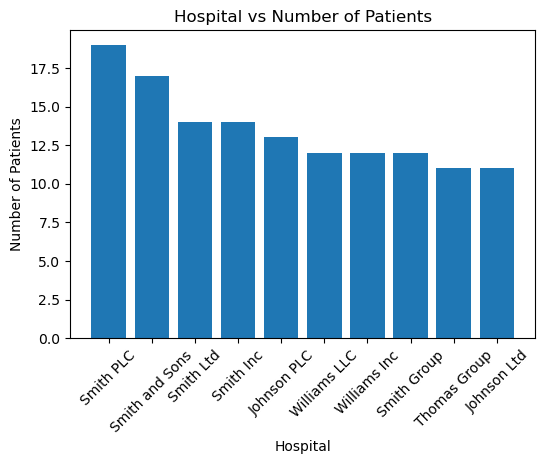

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
plt.bar(x = 'Name', height = 'Total_Patients', data = top_hos)
plt.xlabel('Hospital')
plt.ylabel('Number of Patients')
plt.title ('Hospital vs Number of Patients')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

# SQL Query to fetch Number of Patients Per Disease

In [47]:
conn = sqlite3.connect("healthcare.db")
top_dis = pd.read_sql_query("SELECT di.DiseaseName, COUNT(a.PatientID) as Total_Patients FROM Admission a JOIN Disease di on di.DiseaseID = a.DiseaseID GROUP BY di.DiseaseName ORDER BY Total_Patients DESC",conn)
display(top_dis)

,DiseaseName,Total_Patients
0,Asthma,1708
1,Cancer,1703
2,Hypertension,1688
3,Arthritis,1650
4,Obesity,1628
5,Diabetes,1623


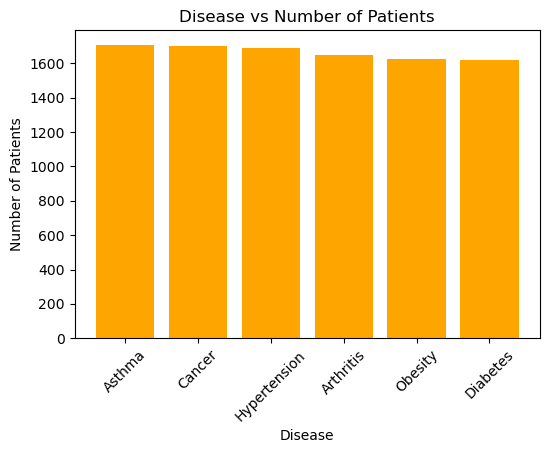

In [390]:
plt.figure(figsize=(6,4))
plt.bar(x = 'DiseaseName', height = 'Total_Patients', data = top_dis, color = 'orange')
plt.xlabel('Disease')
plt.ylabel('Number of Patients')
plt.title('Disease vs Number of Patients')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

# SQL Query to fetch the Top 10 Most Expensive Hospitals

In [49]:
#most expensive hospital by average billing amounts
conn = sqlite3.connect("healthcare.db")
exp_hos = pd.read_sql_query("SELECT h.Name, ROUND(SUM(a.BillingAmount),2) as Total_Amount FROM Admission a JOIN Hospital h on h.HospitalID = a.HospitalID GROUP BY h.Name ORDER BY Total_Amount DESC LIMIT 10",conn)
display(exp_hos)

,Name,Total_Amount
0,Smith and Sons,477638.88
1,Smith PLC,432283.55
2,Smith Ltd,428163.07
3,Smith Inc,351463.89
4,Williams LLC,327522.47
5,Thomas Group,327045.37
6,Johnson Ltd,305971.19
7,Davis and Sons,293452.52
8,Jones Inc,290351.19
9,Brown LLC,284695.67


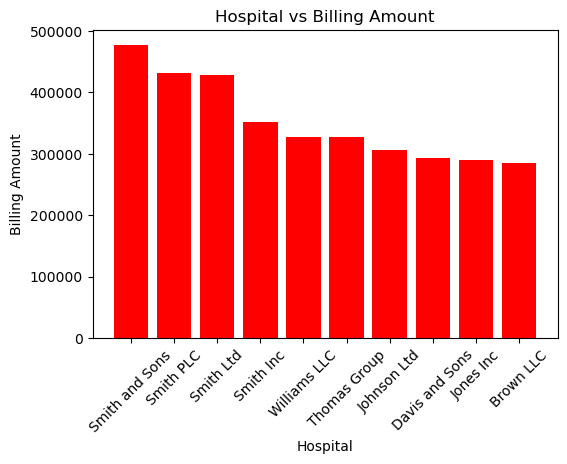

In [391]:
plt.figure(figsize=(6,4))
plt.bar(x = 'Name', height = 'Total_Amount', data = exp_hos, color = 'red')
plt.xlabel('Hospital')
plt.ylabel('Billing Amount')
plt.title('Hospital vs Billing Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

# SQL Query to fetch the Average Length of Stay in Hospital per Disease

In [51]:
conn = sqlite3.connect("healthcare.db")
df_dis = pd.read_sql_query("SELECT di.DiseaseName, AVG(JULIANDAY(a.DischargeDate) - JULIANDAY(a.DateofAdmission)) AS Length_Stay FROM Admission a JOIN Disease di on di.DiseaseID = a.DiseaseID GROUP BY di.DiseaseName ORDER BY Length_Stay DESC",conn)
display(df_dis)

,DiseaseName,Length_Stay
0,Arthritis,15.990303
1,Diabetes,15.574245
2,Asthma,15.481265
3,Cancer,15.479742
4,Hypertension,15.430095
5,Obesity,15.421990


# SQL Query to understand the distribution of different Admission Types

In [52]:
conn = sqlite3.connect("healthcare.db")
dist = pd.read_sql_query("SELECT t.Type as Admission_Type, COUNT(*) as Number FROM Admission a JOIN AdmissionType t on t.AdTypeID = a.AdTypeID group by t.type ORDER BY Number DESC ",conn)
display(dist)

,Admission_Type,Number
0,Urgent,3391
1,Emergency,3367
2,Elective,3242


# SQL Query to check the frequency of each medication used 

In [53]:
conn = sqlite3.connect("healthcare.db")
dism = pd.read_sql_query("SELECT m.MedicationName, COUNT(*) as Number FROM Admission a JOIN Medication m on m.MedicationID = a.MedicationID group by m.MedicationName ORDER BY Number DESC ",conn)
display(dism)

,MedicationName,Number
0,Penicillin,2079
1,Lipitor,2015
2,Ibuprofen,1976
3,Aspirin,1968
4,Paracetamol,1962


# SQL Query to check the frequency of the test results

In [54]:
conn = sqlite3.connect("healthcare.db")
disr = pd.read_sql_query("SELECT r.ResultType, COUNT(*) as Number FROM Admission a JOIN Result r on r.ResultID = a.ResultID group by r.ResultType ORDER BY Number DESC ",conn)
display(disr)

,ResultType,Number
0,Abnormal,3456
1,Inconclusive,3277
2,Normal,3267


# SQL Query to find Frequency of Patients per Insurance Company

In [396]:
conn = sqlite3.connect("healthcare.db")
dism = pd.read_sql_query("SELECT i.Name, COUNT(*) as Number_Patients FROM Admission a JOIN InsuranceProvider i on i.InsuranceID = a.InsuranceID group by i.Name ORDER BY Number_Patients DESC ",conn)
display(dism)

,Name,Number_Patients
0,Cigna,2040
1,Blue Cross,2032
2,Aetna,2025
3,UnitedHealthcare,1978
4,Medicare,1925


# SQL Query to Calculate AVG Billing Amount per Insurance Company

In [56]:
conn = sqlite3.connect("healthcare.db")
disi = pd.read_sql_query("SELECT i.Name, AVG(a.BillingAmount) as Average FROM Admission a JOIN InsuranceProvider i on i.InsuranceID = a.InsuranceID group by i.Name ORDER BY Average DESC ",conn)
display(disi)

,Name,Average
0,Aetna,25837.923338
1,Cigna,25656.946859
2,Blue Cross,25652.489617
3,UnitedHealthcare,25404.685388
4,Medicare,25002.480429


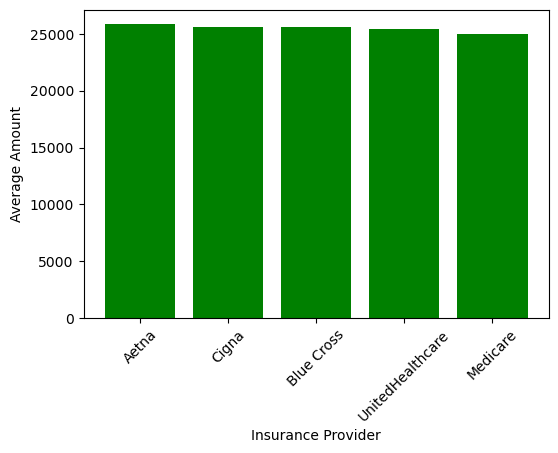

In [57]:
plt.figure(figsize=(6,4))
plt.bar(x = 'Name', height = 'Average', data = disi, color = 'green')
plt.xlabel('Insurance Provider')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

# AVG Billing Amount per Disease

In [58]:
conn = sqlite3.connect("healthcare.db")
disi = pd.read_sql_query("SELECT d.DiseaseName, round(AVG(a.BillingAmount),2) as Average FROM Admission a JOIN Disease d on d.DiseaseID = a.DiseaseID group by d.DiseaseName ORDER BY Average DESC ",conn)
display(disi)

,DiseaseName,Average
0,Diabetes,26060.12
1,Obesity,25720.84
2,Cancer,25539.10
3,Asthma,25416.87
4,Hypertension,25198.03
5,Arthritis,25187.63


Text(0, 0.5, 'Y-axis')

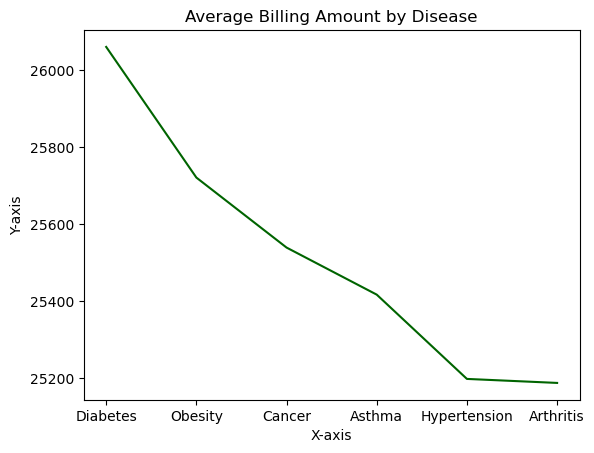

In [59]:
plt.plot(disi.DiseaseName, disi.Average , label='Line Plot',color = 'darkgreen')

# Step 4: Customize the plot (optional)
plt.title('Average Billing Amount by Disease')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
# Display legend if labels are provided


# Most Prevalent Disease by Month 

In [61]:
#frequency of diseases with month
conn = sqlite3.connect("healthcare.db")
disi = pd.read_sql_query("with temp as(SELECT  strftime('%m', a.DateofAdmission)as Month,d.DiseaseName,(count(d.DiseaseName)) as Count from Admission a join Disease d on d.DiseaseID=a.DiseaseID group by Month, d.DiseaseName) select Month , DiseaseName,max(Count) as Disease_To_lookout_for from temp group by Month",conn)
display(disi)


,Month,DiseaseName,Disease_To_lookout_for
0,01,Cancer,164
1,02,Arthritis,151
2,03,Diabetes,156
3,04,Asthma,162
4,05,Asthma,158
5,06,Arthritis,170
6,07,Cancer,145
7,08,Diabetes,157
8,09,Hypertension,153
9,10,Hypertension,173


# Doctors Available Per Disease


In [66]:
conn = sqlite3.connect("healthcare.db")
disi = pd.read_sql_query("SELECT DiseaseName,count(DoctorID) as DoctorsAvailable from Admission a join Disease d on d.DiseaseID=a.DiseaseID group by DiseaseName",conn)
display(disi)

,DiseaseName,DoctorsAvailable
0,Arthritis,1650
1,Asthma,1708
2,Cancer,1703
3,Diabetes,1623
4,Hypertension,1688
5,Obesity,1628


# Doctors Per Hospital

In [67]:
### Numbers of doctors by Hospital
conn = sqlite3.connect("healthcare.db")
num_doc = pd.read_sql_query("SELECT h.name, count(d.doctorid) as Num_Doctors FROM Admission a JOIN Hospital h on h.HospitalID = a.hospitalid JOIN Doctor d on d.doctorid = a.doctorid group by h.name ORDER BY Num_Doctors DESC LIMIT 10", conn)
display(num_doc)

,Name,Num_Doctors
0,Smith PLC,19
1,Smith and Sons,17
2,Smith Ltd,14
3,Smith Inc,14
4,Johnson PLC,13
5,Williams LLC,12
6,Williams Inc,12
7,Smith Group,12
8,Thomas Group,11
9,Johnson Ltd,11


# SQL Query to aggregate the denormalised dataset using JOINS 

In [23]:
conn = sqlite3.connect("healthcare.db")
final_df = pd.read_sql_query('''SELECT 
    p.name,
    p.age,
    p.gender,
    p.'blood group',
    d.DiseaseName,
    a.DateofAdmission,
    doc.name AS DoctorName,
    h.name AS HospitalName,
    ip.name AS InsuranceProviderName,
    a.BillingAmount,
    a.RoomNumber,
    at.type AS AdmissionType,
    a.DischargeDate,
    med.MedicationName,
    res.ResultType 
FROM 
    Admission a 
JOIN 
    patient p ON a.PatientID = p.PatientID 
JOIN 
    Doctor doc ON doc.DoctorID = a.DoctorID 
JOIN 
    hospital h ON h.HospitalID = a.HospitalID 
JOIN 
    InsuranceProvider ip ON ip.InsuranceID = a.InsuranceID 
JOIN 
    Disease d ON d.DiseaseID = a.DiseaseID 
JOIN 
    Medication med ON med.MedicationID = a.MedicationID 
JOIN 
    AdmissionType at ON at.AdTypeID = a.AdTypeID 
JOIN 
    Result res ON res.ResultID = a.ResultID;
''',conn)
display(final_df)

,Name,Age,Gender,Blood Group,DiseaseName,DateofAdmission,DoctorName,HospitalName,InsuranceProviderName,BillingAmount,RoomNumber,AdmissionType,DischargeDate,MedicationName,ResultType
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   10000 non-null  object 
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Blood Group            10000 non-null  object 
 4   DiseaseName            10000 non-null  object 
 5   DateofAdmission        10000 non-null  object 
 6   DoctorName             10000 non-null  object 
 7   HospitalName           10000 non-null  object 
 8   InsuranceProviderName  10000 non-null  object 
 9   BillingAmount          10000 non-null  float64
 10  RoomNumber             10000 non-null  int64  
 11  AdmissionType          10000 non-null  object 
 12  DischargeDate          10000 non-null  object 
 13  MedicationName         10000 non-null  object 
 14  ResultType             10000 non-null  object 
dtypes: 

changing the datatype of DateofAdmission and DischargeDate column inorder to calculate length of stay

In [25]:
final_df.DateofAdmission=pd.to_datetime(final_df.DateofAdmission)

In [26]:
final_df.DischargeDate=pd.to_datetime(final_df.DischargeDate)

In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Name                   10000 non-null  object        
 1   Age                    10000 non-null  int64         
 2   Gender                 10000 non-null  object        
 3   Blood Group            10000 non-null  object        
 4   DiseaseName            10000 non-null  object        
 5   DateofAdmission        10000 non-null  datetime64[ns]
 6   DoctorName             10000 non-null  object        
 7   HospitalName           10000 non-null  object        
 8   InsuranceProviderName  10000 non-null  object        
 9   BillingAmount          10000 non-null  float64       
 10  RoomNumber             10000 non-null  int64         
 11  AdmissionType          10000 non-null  object        
 12  DischargeDate          10000 non-null  datetime64[ns]
 13  Me

In [28]:
final_df['LengthOfStay']=final_df.DischargeDate-final_df.DateofAdmission

In [29]:
#checking for null values in the dataset
final_df.isna().sum()

Name                     0
Age                      0
Gender                   0
Blood Group              0
DiseaseName              0
DateofAdmission          0
DoctorName               0
HospitalName             0
InsuranceProviderName    0
BillingAmount            0
RoomNumber               0
AdmissionType            0
DischargeDate            0
MedicationName           0
ResultType               0
LengthOfStay             0
dtype: int64

changing datatype of Length of Stay column to object inorder to strip numerical value of number of days 

In [30]:
final_df.LengthOfStay=final_df.LengthOfStay.astype("object")

In [31]:
#function to strip length of stay value and convert the value into integer
def convert_length(vals):
    return(int(str(vals).split(" ")[0]))

final_df['LengthOfStay']=final_df['LengthOfStay'].apply(convert_length)

In [32]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Name                   10000 non-null  object        
 1   Age                    10000 non-null  int64         
 2   Gender                 10000 non-null  object        
 3   Blood Group            10000 non-null  object        
 4   DiseaseName            10000 non-null  object        
 5   DateofAdmission        10000 non-null  datetime64[ns]
 6   DoctorName             10000 non-null  object        
 7   HospitalName           10000 non-null  object        
 8   InsuranceProviderName  10000 non-null  object        
 9   BillingAmount          10000 non-null  float64       
 10  RoomNumber             10000 non-null  int64         
 11  AdmissionType          10000 non-null  object        
 12  DischargeDate          10000 non-null  datetime64[ns]
 13  Me

<Axes: xlabel='LengthOfStay', ylabel='BillingAmount'>

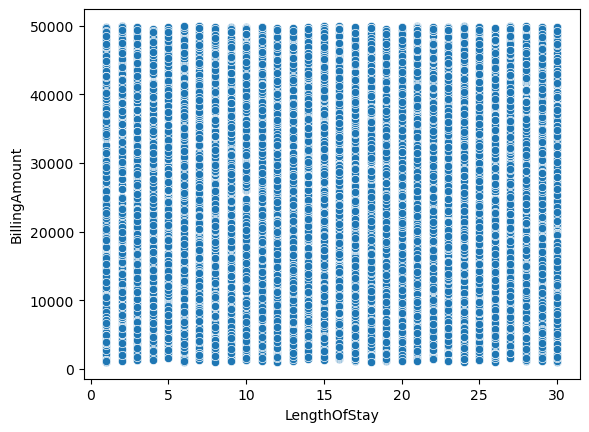

In [33]:
import seaborn as sns
sns.scatterplot(x="LengthOfStay",y="BillingAmount",data=final_df)

In [16]:
final_df.LengthOfStay.corr(final_df.BillingAmount)

-0.013506705938534161

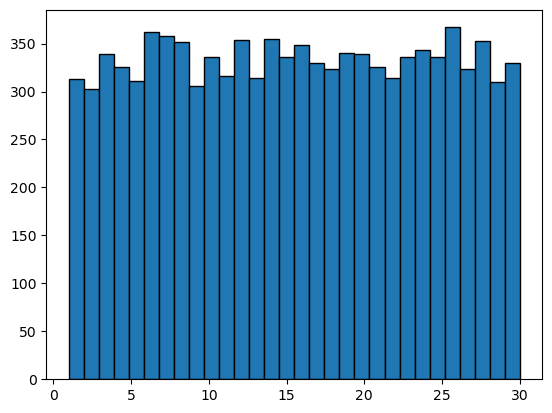

In [18]:
import matplotlib.pyplot as plt
plt.hist(final_df['LengthOfStay'], bins=30, edgecolor='black')
plt.show()

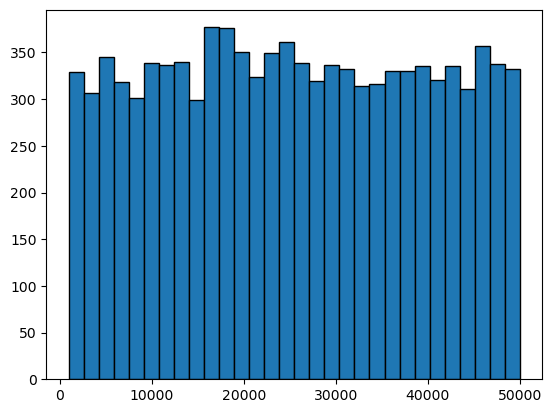

In [34]:
plt.hist(final_df['BillingAmount'], bins=30, edgecolor='black')
plt.show()

Both the Length of Stay and Billing Amount columns seem to be uniformly distributed through the histograms above.

In [35]:
final_df.columns

Index(['Name', 'Age', 'Gender', 'Blood Group', 'DiseaseName',
       'DateofAdmission', 'DoctorName', 'HospitalName',
       'InsuranceProviderName', 'BillingAmount', 'RoomNumber', 'AdmissionType',
       'DischargeDate', 'MedicationName', 'ResultType', 'LengthOfStay'],
      dtype='object')

Dropping the PatientName, DateofAdmission,DoctorName,HospitalName, RoomNumber,DischargeDate columns
PatientName,DoctorName,HospitalName --> dropped due to high dimensionality
DateofAdmission,RoomNumber, DischargeDate --> dropped because of lack of usefulness

In [36]:
final_df.drop(['Name','DateofAdmission','DoctorName','HospitalName','RoomNumber','DischargeDate'],inplace=True,axis=1)

In [37]:
final_df.head()

,Age,Gender,Blood Group,DiseaseName,InsuranceProviderName,BillingAmount,AdmissionType,MedicationName,ResultType,LengthOfStay
0,81,Female,O-,Diabetes,Medicare,37490.983364,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Medicare,36874.896997,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24


In [38]:
final_df["InsuranceProviderName"].nunique()

5

# One Hot Encoding for Categorical Features

In [39]:
final_df = pd.get_dummies(final_df, columns=['Gender','MedicationName','AdmissionType','Blood Group','DiseaseName','InsuranceProviderName'],dtype=int)


In [40]:
#converting target variable into numerical labels (0,1,2) for model building
def cat_to_int(val):
    if val=="Abnormal":
        return 0
    elif val=="Inconclusive":
        return 1
    else:
        return 2

In [41]:
final_df.ResultType.value_counts()

ResultType
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64

In [42]:
final_df['ResultType']=final_df["ResultType"].apply(cat_to_int)
final_df.ResultType.value_counts()

ResultType
0    3456
1    3277
2    3267
Name: count, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(['ResultType'],axis=1), final_df['ResultType'], test_size=0.2, random_state=72)

In [83]:
#Build Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.3465
              precision    recall  f1-score   support

           0       0.34      0.43      0.38       660
           1       0.35      0.28      0.31       704
           2       0.35      0.33      0.34       636

    accuracy                           0.35      2000
   macro avg       0.35      0.35      0.34      2000
weighted avg       0.35      0.35      0.34      2000



In [85]:
feature_names = X_train.columns
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance',ascending = False).head(10)

,Feature,Importance
1,BillingAmount,0.175529
0,Age,0.158278
2,LengthOfStay,0.145747
11,AdmissionType_Emergency,0.022682
10,AdmissionType_Elective,0.022417
12,AdmissionType_Urgent,0.022167
28,InsuranceProviderName_Blue Cross,0.019627
30,InsuranceProviderName_Medicare,0.019605
27,InsuranceProviderName_Aetna,0.019333
21,DiseaseName_Arthritis,0.018959


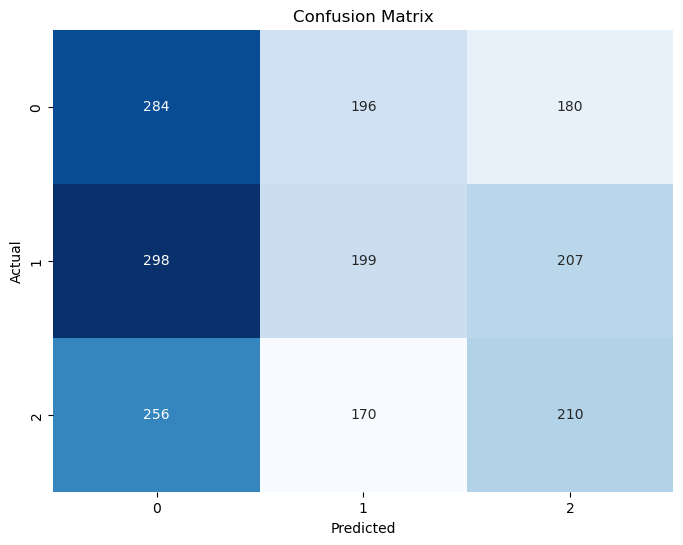

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = clf.classes_
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [87]:
target_class = [0,1,2]
specificity = []
for c in target_class:
    TN = sum(cm[i, j] for i in range(len(cm)) for j in range(len(cm)) if i != c and j != c)
    FP = sum(cm[i, c] for i in range(len(cm)) if i != c)
    s = TN / (TN + FP)
    specificity.append(s)
print(specificity)
    

    

[0.5865671641791045, 0.7175925925925926, 0.716275659824047]


In [91]:
# Results:
print(f'Specificity for 0 class label : {specificity[0]}')
print(f'Sensitivity for 0 class label : {0.43}')
print(f'Specificity for 1 class label : {specificity[1]f}')
print(f'Specificity for 0 class label : {0.28}')
print(f'Specificity for 2 class label : {specificity[2]}')
print(f'Specificity for 0 class label : {0.33}')

SyntaxError: f-string: invalid syntax. Perhaps you forgot a comma? (3057881443.py, line 4)

Accuracy: 0.33
              precision    recall  f1-score   support

           0       0.33      1.00      0.50       660
           1       0.00      0.00      0.00       704
           2       0.00      0.00      0.00       636

    accuracy                           0.33      2000
   macro avg       0.11      0.33      0.17      2000
weighted avg       0.11      0.33      0.16      2000



/Users/kumarbaibhav/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kumarbaibhav/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kumarbaibhav/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


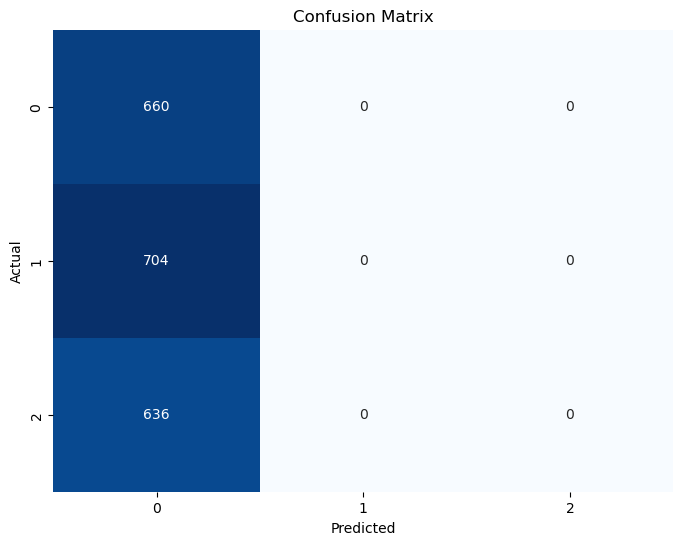

Specificity: 0.59


In [64]:
#Build Logistic Regression Model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
labels = clf.classes_
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
target_class = 0
TN = sum(cm[i, j] for i in range(len(cm)) for j in range(len(cm)) if i != target_class and j != target_class)
FP = sum(cm[i, target_class] for i in range(len(cm)) if i != target_class)
print(f'Specificity: {specificity:.2f}')

Accuracy: 0.3235
              precision    recall  f1-score   support

           0       0.32      0.31      0.31       660
           1       0.34      0.31      0.32       704
           2       0.31      0.35      0.33       636

    accuracy                           0.32      2000
   macro avg       0.32      0.32      0.32      2000
weighted avg       0.32      0.32      0.32      2000



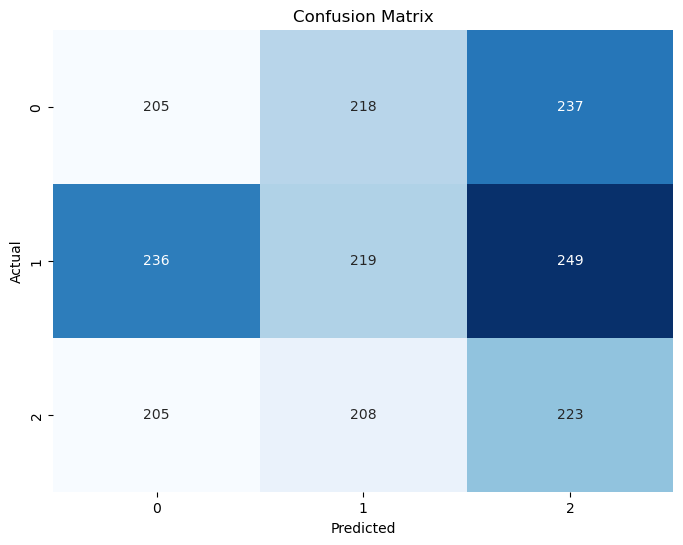

Specificity: 0.59


In [67]:
# Build Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
labels = clf.classes_
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
target_class = 0
TN = sum(cm[i, j] for i in range(len(cm)) for j in range(len(cm)) if i != target_class and j != target_class)
FP = sum(cm[i, target_class] for i in range(len(cm)) if i != target_class)
print(f'Specificity: {specificity:.2f}')

# Conclusions:
1) The Random Forest model performed the best on the data with an overall accuracy of about 34.65%, the accuracy for predicting all the 3 labels was also approximately equal which maybe due to the balance between the classes in the data.
2) The Logistic Regression Model gave an overall accuracy of 33%, but it was only able to predict '0' class label correctly, and not a single observation corresponding to labels '1' and '2' were predicted correctly by the logistic regression model.
3) The Single Classification Tree model gave an overall accuracy of about 32%, with the accuracy of predicting all 3 labels in the range of (31-33)% which is similar to the Random Forest model.
4) Using the feature importance values obtained from the random forest model, we can conclude that Billing Amount, Age and Length of Stay were the most important features influencing the classification of target variable (ResultType).
5) We can also conclude that despite the Random Forest model despite performing the best, the overall accuracy of 35% is not satisfactory and is almost equal to randomly predicting the response with the probability being (1/3). 